You are given two integers m and n representing a 0-indexed m x n grid. You are also given two 2D integer arrays guards and walls where guards[i] = [rowi, coli] and walls[j] = [rowj, colj] represent the positions of the ith guard and jth wall respectively.

A guard can see every cell in the four cardinal directions (north, east, south, or west) starting from their position unless obstructed by a wall or another guard. A cell is guarded if there is at least one guard that can see it.

Return the number of unoccupied cells that are not guarded.

 

Example 1:

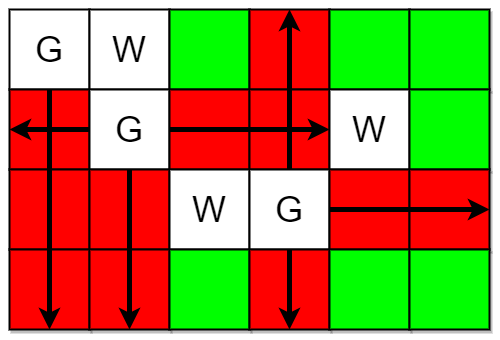

Input: m = 4, n = 6, guards = [[0,0],[1,1],[2,3]], walls = [[0,1],[2,2],[1,4]]
Output: 7
Explanation: The guarded and unguarded cells are shown in red and green respectively in the above diagram.
There are a total of 7 unguarded cells, so we return 7.

Example 2:

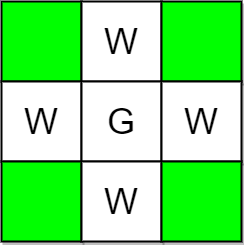

Input: m = 3, n = 3, guards = [[1,1]], walls = [[0,1],[1,0],[2,1],[1,2]]
Output: 4
Explanation: The unguarded cells are shown in green in the above diagram.
There are a total of 4 unguarded cells, so we return 4.

 

Constraints:

    1 <= m, n <= 105
    2 <= m * n <= 105
    1 <= guards.length, walls.length <= 5 * 104
    2 <= guards.length + walls.length <= m * n
    guards[i].length == walls[j].length == 2
    0 <= rowi, rowj < m
    0 <= coli, colj < n
    All the positions in guards and walls are unique.



In [ ]:
class Solution:
    UNGUARDED = 0
    GUARDED = 1
    GUARD = 2
    WALL = 3
    def countUnguarded(self, m: int, n: int, guards: List[List[int]], walls: List[List[int]]) -> int:
        grid = [[self.UNGUARDED] * n for _ in range(m)]

        # Mark guards' positions
        for guard in guards:
            grid[guard[0]][guard[1]] = self.GUARD

        # Mark walls' positions
        for wall in walls:
            grid[wall[0]][wall[1]] = self.WALL

        # Mark cells as guarded by traversing from each guard
        for guard in guards:
            self._mark_guarded(guard[0], guard[1], grid)

        # Count unguarded cells
        count = 0
        for row in grid:
            for cell in row:
                if cell == self.UNGUARDED:
                    count += 1

        return count
    
    def _mark_guarded(self, row: int, col: int, grid: List[List[int]]) -> None:
        # Traverse upwards
        for r in range(row - 1, -1, -1):
            if grid[r][col] == self.WALL or grid[r][col] == self.GUARD:
                break
            grid[r][col] = self.GUARDED

        # Traverse downwards
        for r in range(row + 1, len(grid)):
            if grid[r][col] == self.WALL or grid[r][col] == self.GUARD:
                break
            grid[r][col] = self.GUARDED

        # Traverse leftwards
        for c in range(col - 1, -1, -1):
            if grid[row][c] == self.WALL or grid[row][c] == self.GUARD:
                break
            grid[row][c] = self.GUARDED

        # Traverse rightwards
        for c in range(col + 1, len(grid[0])):
            if grid[row][c] == self.WALL or grid[row][c] == self.GUARD:
                break
            grid[row][c] = self.GUARDED
    